In [8]:
#import required packages 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import ImageChops



In [9]:
input_img = cv2.imread('./Sample_images/1.jpg')

#change to grayscale, scale, set threshold
scale_percent = 8 #percent of original image size
width = int(input_img.shape[1]* scale_percent/100)
height = int(input_img.shape[0]* scale_percent/100)
dim = (width, height)
input_img_resized = cv2.resize(input_img, dim, interpolation = cv2.INTER_AREA)
thresh, input_img_bw = cv2.threshold(input_img_resized,50,250,cv2.THRESH_BINARY)

Images:  ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg']
Images count:  8
1 / 8 :  0.jpg
2 / 8 :  1.jpg
3 / 8 :  2.jpg
4 / 8 :  3.jpg
5 / 8 :  4.jpg
6 / 8 :  5.jpg
7 / 8 :  6.jpg
8 / 8 :  7.jpg


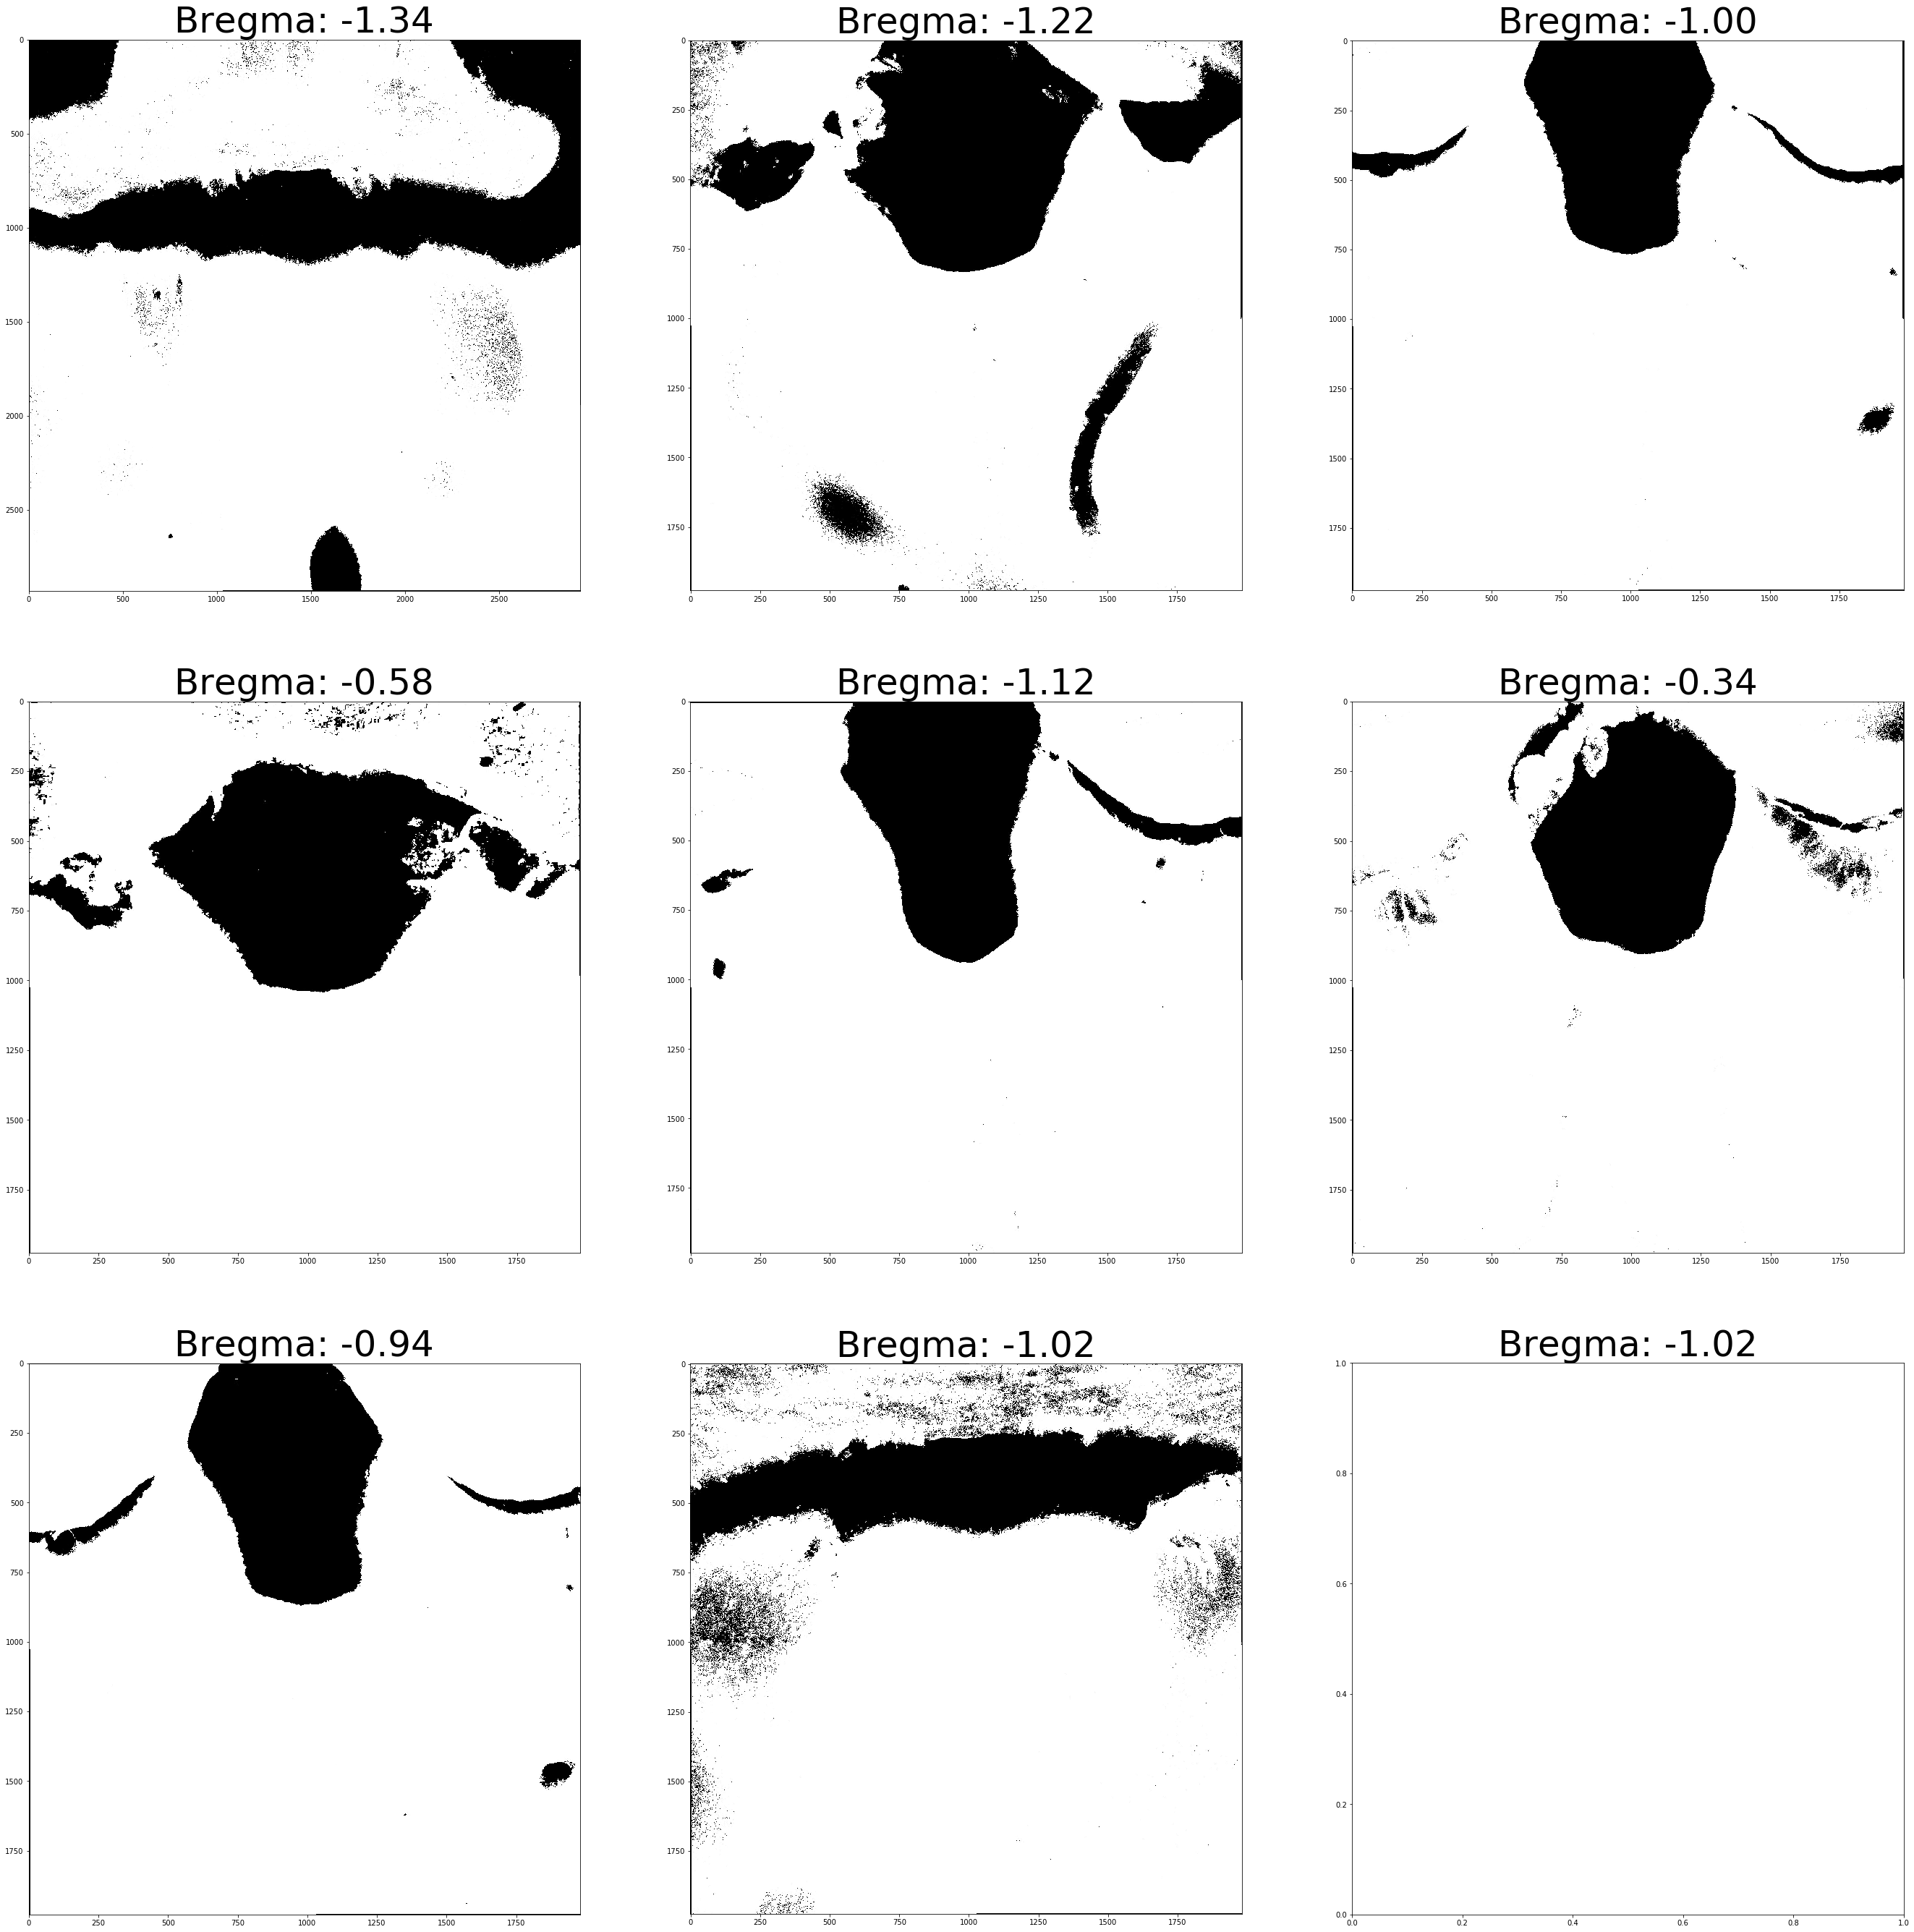

In [11]:
import math

# Config:
template_img_dir = './Reference_images'
result_grid_filename = './grid.jpg'
result_figsize_resolution = 40 # 1 = 100px

images_list = sorted(os.listdir(template_img_dir))
images_count = len(images_list)
print('Images: ', images_list)
print('Images count: ', images_count)

# Calculate the grid size:
grid_size = math.ceil(math.sqrt(images_count))

# Create plt plot:
fig, axes = plt.subplots(grid_size, grid_size, figsize=(result_figsize_resolution, result_figsize_resolution))

current_file_number = 0

for image_filename in images_list:
    x_position = current_file_number % grid_size
    y_position = current_file_number // grid_size
    plt_image = plt.imread(template_img_dir + '/' + images_list[current_file_number])
    axes[x_position, y_position].imshow(plt_image)
    axes[0,0].set_title('Bregma: -1.34', fontsize=50)
    axes[0,1].set_title('Bregma: -1.22', fontsize=50)
    axes[0,2].set_title('Bregma: -1.00', fontsize=50)
    axes[1,0].set_title('Bregma: -0.58', fontsize=50)
    axes[1,1].set_title('Bregma: -1.12', fontsize=50)
    axes[1,2].set_title('Bregma: -0.34', fontsize=50)
    axes[2,0].set_title('Bregma: -0.94', fontsize=50)
    axes[2,1].set_title('Bregma: -1.02', fontsize=50)
    axes[2,2].set_title('Bregma: -1.02', fontsize=50)
    
    print((current_file_number + 1), '/', images_count, ': ', image_filename)

    current_file_number += 1

plt.subplots_adjust(left=0.0, right=.9, bottom=0.0, top=.9)
plt.savefig(result_grid_filename)

In [4]:
template_grid = cv2.imread('./grid.jpg')

In [5]:
#resize template grid
scale_percent = 25 #percent of original image size
temp_width = int(template_grid.shape[1] * scale_percent/100)
temp_height = int(template_grid.shape[0]* scale_percent/100)
temp_dim = (temp_width, temp_height)
template_grid= cv2.resize(template_grid, temp_dim, interpolation = cv2.INTER_AREA)


In [6]:
res = cv2.matchTemplate(input_img_bw, template_grid, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1]+height)


cv2.rectangle(template_grid, top_left, bottom_right, 255, 2)

#for rect_position in selection_rect:
  #  if 

output_filepath = './Processed_images/1.jpg'
status = cv2.imwrite(output_filepath, template_grid)

print('New image has been saved: ', status) 




New image has been saved:  True


In [7]:
if bottom_right[0] == 694:
    print('Bregma coordinates are:', bottom_right[1]) 

In [ ]:
#shows image grid; blue square indicates closest match
cv2.imshow('temp', template_grid)

cv2.waitKey(0)
cv2.destroyAllWindows()